In [3]:
import numpy as np
import matplotlib.pyplot as plt
import MyFunctions as funs
from scipy.optimize import curve_fit

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# $\tanh$ function

First of all, we define a $\tanh$ equation of state, imposing $w(a\to 0) = -1/3$ and $w(a\to\infty) = 0$. We get the following:

In [2]:
def w_toni(a,k,a_0):
    return 1./6. - 1./6.*np.tanh(k*np.log(a/a_0))

## Parameters

This function depends on two parameters:
- $a_0$ sets the scale factor at which the UR to NR transition happens.
- $k$ sets the slope of the transition.

There are some heuristic reasonable values for both parameters, but we also provide a function for fitting the parameters to best fit a certain mass.

In [37]:
# Heuristic ansatz for the scale factor and the slope, for a given mass
def m_to_a0(m_eV):
    z = 1890*m_eV
    return 1/(1+z)

def m_to_k0():
    return 0.90885

# Fitting functions for data
# First of all, we retrieve the w(a) data for the desired mass
bkg_data = funs.class_bkgout_to_df("output/default_ncdm_0.3eV_background.dat", cols = funs.cols_bkg_ncdm)
a_data = 1./(1.+bkg_data['z'])
w_data = bkg_data['p_ncdm[0]']/bkg_data['rho_ncdm[0]']

# Then, we use the fitting function
mass = 0.1
pars = curve_fit(w_toni,a_data,w_data,
                 p0 =  (m_to_a0(mass),m_to_k0()), 
                 bounds = ((0,0),(np.inf,np.inf)))

print("# MASS = {3:.3f} eV #\n-------------------\nheuristic a_0 = {0:.3e},\nbest-fit  a_0 = {2:.3e},\nbest-fit  k   = {1:.4f}".format(m_to_a0(mass),pars[0][0],pars[0][1],mass))

# MASS = 0.100 eV #
-------------------
heuristic a_0 = 5.263e-03,
best-fit  a_0 = 5.315e-03,
best-fit  k   = 0.9089


This is a table summary of the best-fit values for $a_0, k$.

| Mass (eV) | Heuristic $a_0$ | Bestfit $a_0$ | Bestfit $k$ |
| --------- | --------------- | ------------- | ----------- |
| 1.0       | 0.0005288       | 0.0005315     | 0.9088      |
| 0.33      | 0.001601        | 0.001611      | 0.9089      |
| 0.1       | 0.005263        | 0.005315      | 0.9089      |

## Defining the integral of w

We will need the integral (check!)
$$
I = a_{\mathrm{ini}}^{-4}\exp\left\{-3\int_{a_\mathrm{ini}}^a \frac{da}{a}(1+w(a))\right\}
$$

In [38]:
def int_w(a,k,a_0):
    # Assuming a_ini  << a_0
    def integral(a):
        return 7./6.*np.log(a)-np.log(np.cosh(k*np.log(a/a_0)))/6./k
    intini = np.sqrt(a_0)/2**(1/(2*k))
    return np.exp(-3*(integral(a)))/intini

# Sigmoid function

In [27]:
def w_sigm(a,k,a0):
    return 1./3.*(1.-1./(1.+np.exp(-2*k*np.log(a/a0))))

In [30]:
# Heuristic ansatz for the scale factor and the slope, for a given mass
def m_to_a0(m_eV):
    z = 1890*m_eV
    return 1/(1+z)

def m_to_k0():
    return 0.90885

# Fitting functions for data
# First of all, we retrieve the w(a) data for the desired mass
bkg_data = funs.class_bkgout_to_df("output/default_ncdm_3eV_background.dat", cols = funs.cols_bkg_ncdm)
a_data = 1./(1.+bkg_data['z'])
w_data = bkg_data['p_ncdm[0]']/bkg_data['rho_ncdm[0]']

# Then, we use the fitting function
mass = 1
pars = curve_fit(w_sigm,a_data,w_data,
                 p0 =  (m_to_k0(),m_to_a0(mass)), 
                 bounds = ((0,0),(np.inf,np.inf)))

print("# MASS = {3:.3f} eV #\n-------------------\nheuristic a_0 = {0:.3e},\nbest-fit  a_0 = {2:.3e},\nbest-fit  k   = {1:.4f}".format(m_to_a0(mass),pars[0][0],pars[0][1],mass))

# MASS = 1.000 eV #
-------------------
heuristic a_0 = 5.288e-04,
best-fit  a_0 = 5.315e-04,
best-fit  k   = 0.9089


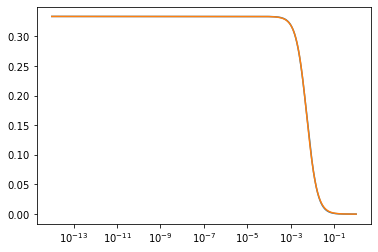

In [29]:
plt.xscale('log')
plt.plot(a_data,w_data)
plt.plot(a_data,w_sigm(a_data,0.9089,5.315e-3))

# sqrt sigmoid function

In [4]:
def w_sqrt(a,k,a0):
    return 1./6.*(1.-np.log(a/a0)/np.sqrt(k**2+np.log(a/a0)**2))

In [7]:
# Heuristic ansatz for the scale factor and the slope, for a given mass
def m_to_a0(m_eV):
    z = 1890*m_eV
    return 1/(1+z)

def m_to_k0():
    return 0.90885

# Fitting functions for data
# First of all, we retrieve the w(a) data for the desired mass
bkg_data = funs.class_bkgout_to_df("output/default_ncdm_0.3eV_background.dat", cols = funs.cols_bkg_ncdm)
a_data = 1./(1.+bkg_data['z'])
w_data = bkg_data['p_ncdm[0]']/bkg_data['rho_ncdm[0]']

# Then, we use the fitting function
mass = 0.1
pars = curve_fit(w_sqrt,a_data,w_data,
                 p0 =  (m_to_k0(),m_to_a0(mass)), 
                 bounds = ((0,0),(np.inf,np.inf)))

print("# MASS = {3:.3f} eV #\n-------------------\nheuristic a_0 = {0:.3e},\nbest-fit  a_0 = {2:.3e},\nbest-fit  k   = {1:.4f}".format(m_to_a0(mass),pars[0][0],pars[0][1],mass))

# MASS = 0.100 eV #
-------------------
heuristic a_0 = 5.263e-03,
best-fit  a_0 = 5.318e-03,
best-fit  k   = 0.9197
